<a href="https://colab.research.google.com/github/UchihaItachi95/ML-Algorithms/blob/KNN/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN
K-Nearest Neighbors Algorithm. The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

The Concept of KNN is very easy a sample is calssify of the popularity vote of its Nearest Neighbors

## Lets consider an example of two classes and two dimensional feature vectors

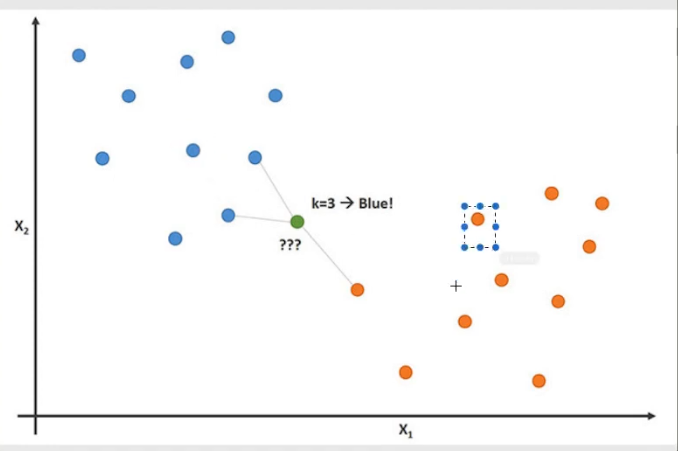

## Here we have two classes blue class and orange class with two dimension (x1 and x2) and what we do here is we have some training samples and for each new sample we want to calssify we calculate the distance of  this sample to each of training samples and we have to look to nearest neighbors

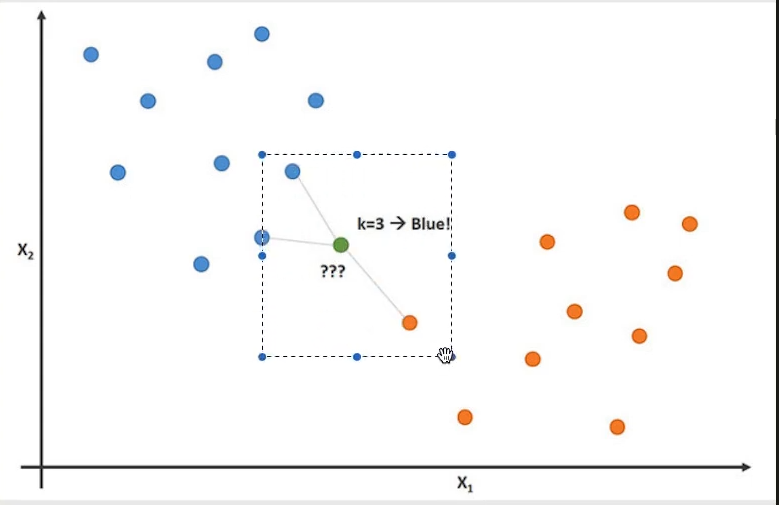


### Here we have to look to 3 nearest neighbor in our case  and then we predict the label based in most common class labels here here (2 blue classes and 1  orange class) then this sample will be in the blue class this this the KNN ;)

# We use the eclidean_distance to calculate the distance
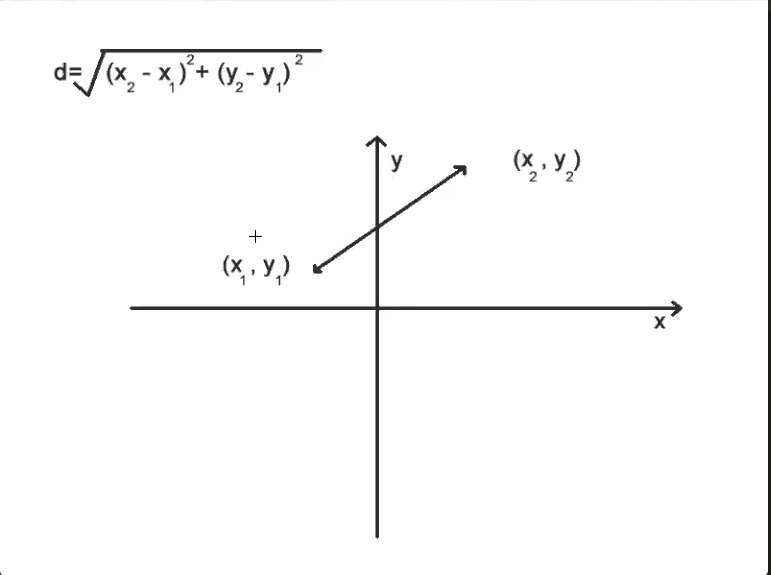


# In more General case
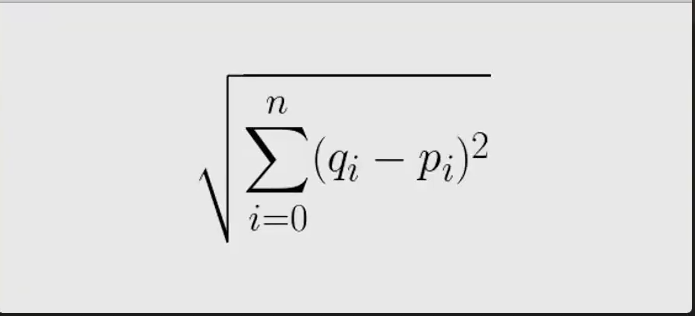

In [ ]:
def euclidean_distance(point1, point2):
    """
    point1: A NumPy array representing the coordinates of the first point.
    point2: A NumPy array representing the coordinates of the second point.
    """
    return np.sqrt(np.sum((point1 - point2)**2))

# Here the start of the Code

In [1]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt # For visualization

In [4]:
def euclidean_distance(point1, point2):
    """
    point1: A NumPy array representing the coordinates of the first point.
    point2: A NumPy array representing the coordinates of the second point.
    """
    return np.sqrt(np.sum((point1 - point2)**2))

# Explanition of Counter


In [ ]:
a = [1, 1, 1, 1,2, 4, 5]
most_common = Counter(a).most_common(1) # 1 : because i need the most common element
print(most_common)
"""
The output of the is a tuble that the first element represent the element most common in the list
in our case in knn it will be the labels.
the second element in the tuble represent the number of accurance of the first element
"""

[(1, 4)]


In [ ]:
a = [1, 1, 1, 1,2, 4, 5]
most_common = Counter(a).most_common(2) # now it's clear what is this parameter for
print(most_common)

[(1, 4), (2, 1)]


# But we need the labels only so

In [ ]:
a = [1, 1, 1, 1,2, 4, 5]
most_common = Counter(a).most_common(1) # now it's clear what is this parameter for
print(most_common[0][0]) # it will print the labels only as we saw above it returns a list of tubles so the first [0]
# for the tuble and the second [0] is four the 1st element in that tuble which in our case is the label we want

1


In [2]:
class KNN:
    def __init__(self, k=3):


        self.k = k

    def fit(self,X,y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self,x):
        # Compute the distance in the form of list comprehension
        # Here we compute the distance between the new sample (x : the parameter of the _predict function) and every sample in the training sample(X.train)
        # Note:  self.X_train refere to the training samples and X_train is just a variable name in the this loop
        distances = [euclidean_distance(x, X_train) for X_train in self.X_train]
        # get k nearst samples, labels
        # Here argsort : after we compute the distances we want to sort them descending to the number of K
        k_indices = np.argsort(distances)[:self.k] # after we made the sort i need the number of nearset elements equal to the number of k
        # here we want to get the labels to this examples (k_indices) to make the majority vote
        # self.y_train[i] : get the labels of the index in k_indices
        k_nearest_labels = [self.y_train[i] for i in k_indices] # here we get the labels of this samples from k_indices

        # majority vote, most common class label
        most_common = Counter(k_nearest_labels).most_common(1) # getting the most accurance of the label in this list
        return most_common[0][0]



# Testing

In [5]:
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=1234
)

k = 3
clf = KNN(k=k)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("KNN classification accuracy", accuracy(y_test, predictions))

KNN classification accuracy 1.0
